In [27]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error
np.set_printoptions(suppress=True, precision=3)

In [11]:
with open('wildfire_data.json', 'r') as f:
    data = json.load(f)


U = np.array(data["U"]["data"]) 
v = np.array(data["v"]["data"])

# train과 test를 8:2 로 분할하여 저장
U_train, U_test, v_train, v_test = train_test_split(U,v,random_state=1,test_size=0.2)


In [12]:
U = np.array(data["U"]["data"]) 
v = np.array(data["v"]["data"])

# train과 test를 8:2 로 분할하여 저장
U_train, U_test, v_train, v_test = train_test_split(U,v,random_state=1,test_size=0.2)



In [ ]:
# (a)
# 표준화 이전 각 열의 평균과 표준편차
U_train_mean_before = np.mean(U_train,axis=0)
U_train_std_before = np.std(U_train,axis=0)
print("U_train_mean_before : ", U_train_mean_before)
print("U_train_std_before : " , U_train_std_before)

# 표준화
sc = StandardScaler()
U_train_normalized = sc.fit_transform(U_train)


# 표준화 이후 각 열의 평균과 표준편차
U_train_mean_after = np.mean(U_train_normalized,axis=0)
U_train_std_after = np.std(U_train_normalized,axis=0)

print("U_train_mean_after : ", U_train_mean_after)
print("U_train_std_after : " , U_train_std_after,"\n")

# 검증 세트 표준화
U_test_normalized = sc.transform(U_test)

print("U_train_normalized : \n" , U_train_normalized)
print("U_test_normalized : \n",U_test_normalized)

U_train_mean_before :  [ 4.69   4.334  7.504 90.642 18.852  3.998  0.027]
U_train_std_before :  [2.303 1.247 2.304 5.382 5.709 1.784 0.331]
U_train_mean_after :  [-0. -0.  0.  0.  0. -0. -0.]
U_train_std_after :  [1. 1. 1. 1. 1. 1. 1.] 

U_train_normalized : 
 [[ 0.135  0.534 -1.954 ... -0.657  0.786 -0.082]
 [-1.602 -0.268  0.215 ...  0.254  0.506 -0.082]
 [-1.602 -0.268  0.649 ...  0.429 -1.007 -0.082]
 ...
 [-0.734  0.534  0.649 ... -0.289 -0.503 -0.082]
 [ 1.003 -0.268 -2.388 ... -1.866  3.028 -0.082]
 [ 1.437  1.336  0.215 ... -0.43   0.001 -0.082]]
U_test_normalized : 
 [[-1.168  0.534  0.215  0.847  0.937 -0.727 -0.082]
 [ 0.135 -0.268  0.649  0.494  1.532 -1.512 -0.082]
 [ 0.569  1.336 -0.219  0.661  0.726 -0.503 -0.082]
 [-0.3   -1.07   0.649  0.345 -0.272  0.001 -0.082]
 [ 1.003 -0.268 -0.219  0.568 -0.114  0.282 -0.082]
 [-0.734 -0.268  0.215  0.178  1.007  0.001 -0.082]
 [ 1.437  1.336  0.215  0.271  0.219  0.282 -0.082]
 [-0.3   -0.268  0.215 -0.082 -0.079  1.515 -0.082]
 

In [ ]:
# (b)
encoder = OneHotEncoder(categories='auto',sparse_output=False)

# 월 컬럼만 추출
month_feature_train = U_train[:,2:3]
month_feature_test = U_test[:,2:3]
#월 컬럼에서 One-Hot encode된 데이터
month_train = encoder.fit_transform(month_feature_train)
month_test = encoder.transform(month_feature_test)

# 월 제외 feature 추출
no_month_feature_train = np.delete(U_train,2,axis=1)
no_month_feature_test = np.delete(U_test,2,axis=1)

# 표준화
no_month_feature_train = sc.fit_transform(no_month_feature_train)
no_month_feature_test = sc.transform(no_month_feature_test)

# bias추가
bias_train = np.ones((U_train.shape[0],1))
bias_test = np.ones((U_test.shape[0],1))

# numpy데이터 통합
U_train_finalData = np.hstack((month_train,no_month_feature_train,bias_train))
U_test_finalData = np.hstack((month_test,no_month_feature_test,bias_test))
print(U_train_finalData,"\n num of feature : ",U_train_finalData.shape[1],"\n")
print(U_test_finalData,"\n num of feature : ",U_test_finalData.shape[1])


[[ 0.     0.     1.    ...  0.786 -0.082  1.   ]
 [ 0.     0.     0.    ...  0.506 -0.082  1.   ]
 [ 0.     0.     0.    ... -1.007 -0.082  1.   ]
 ...
 [ 0.     0.     0.    ... -0.503 -0.082  1.   ]
 [ 0.     1.     0.    ...  3.028 -0.082  1.   ]
 [ 0.     0.     0.    ...  0.001 -0.082  1.   ]] 
 num of feature :  19 

[[ 0.     0.     0.    ... -0.727 -0.082  1.   ]
 [ 0.     0.     0.    ... -1.512 -0.082  1.   ]
 [ 0.     0.     0.    ... -0.503 -0.082  1.   ]
 ...
 [ 0.     0.     0.    ...  0.506 -0.082  1.   ]
 [ 0.     0.     0.    ...  1.795 -0.082  1.   ]
 [ 0.     0.     0.    ... -0.503 -0.082  1.   ]] 
 num of feature :  19


[1.383 1.383 1.383 1.383 1.383 1.383 1.383 1.383 1.383 1.383 1.383 1.383
 1.383 1.383 1.383 1.383 1.384 1.384 1.384 1.384 1.384 1.385 1.385 1.386
 1.386 1.387 1.387 1.388 1.389 1.39  1.391 1.392 1.393 1.395 1.396 1.397
 1.399 1.4   1.402 1.403 1.405 1.407 1.408 1.41  1.412 1.414 1.416 1.419
 1.422 1.425 1.429 1.433 1.438 1.444 1.451 1.459 1.468 1.478 1.489 1.501
 1.515 1.529 1.544 1.56  1.577 1.594 1.611 1.627 1.644 1.66  1.675 1.689
 1.703 1.716 1.727 1.738 1.748 1.757 1.765 1.772 1.779 1.785 1.79  1.794
 1.798 1.802 1.805 1.808 1.81  1.812 1.814 1.816 1.817 1.819 1.82  1.821
 1.821 1.822 1.823 1.823] 
train_minimum :  1.3829313642735614 
train_minimum_lambda :  0.1
[1.268 1.267 1.267 1.267 1.267 1.267 1.267 1.267 1.266 1.266 1.266 1.266
 1.265 1.265 1.264 1.264 1.263 1.263 1.262 1.261 1.261 1.26  1.259 1.258
 1.257 1.256 1.254 1.253 1.252 1.251 1.249 1.248 1.246 1.245 1.243 1.242
 1.241 1.239 1.238 1.236 1.235 1.234 1.232 1.231 1.23  1.229 1.229 1.228
 1.228 1.228 1.229 1.231 1.233 1

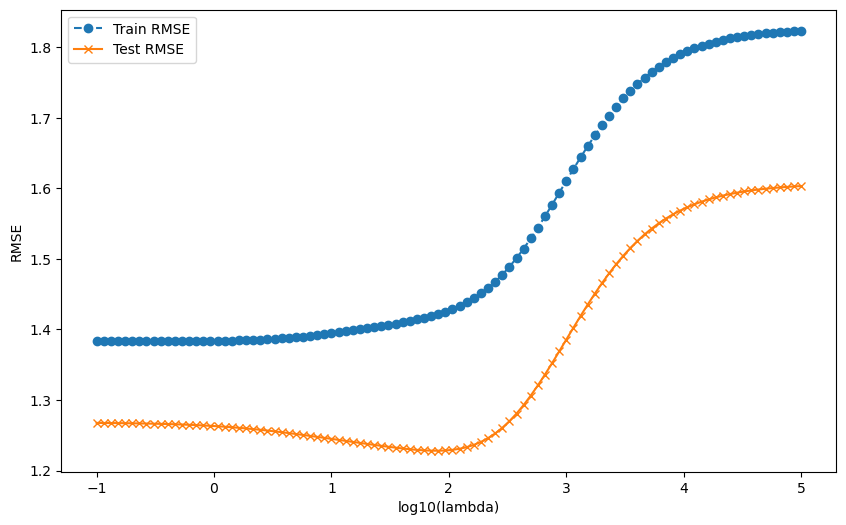

In [ ]:
# (c)
# 로그 스케일로 1.0^-1 ~ 1.0^5 사이의 100개의 값 생성
lambdas = np.logspace(-1,5,100)
rmse_train_data = []
rmse_test_data = []
for alpha in lambdas :
    ridge = Ridge(alpha=alpha,fit_intercept=False)
    ridge.fit(U_train_finalData,v_train)
    v_train_pred = ridge.predict(U_train_finalData)
    v_test_pred = ridge.predict(U_test_finalData)

    rmse_train = root_mean_squared_error(v_train,v_train_pred)
    rmse_test = root_mean_squared_error(v_test,v_test_pred)
    rmse_train_data.append(rmse_train)
    rmse_test_data.append(rmse_test)
    
# numpy배열로 변환
rmse_train_data = np.array(rmse_train_data)
rmse_test_data = np.array(rmse_test_data)

print(rmse_train_data,"\ntrain_minimum : ",rmse_train_data.min(),"\ntrain_minimum_lambda : ",lambdas[rmse_train_data.argmin()])
print(rmse_test_data,"\ntest_minimum : ",rmse_test_data.min(),"\ntest_minimum_lambda : ",lambdas[rmse_test_data.argmin()])

# plot
plt.figure(figsize=(10,6))
plt.plot(np.log10(lambdas), rmse_train_data, label='Train RMSE', linestyle='--', marker='o')
plt.plot(np.log10(lambdas), rmse_test_data, label='Test RMSE', linestyle='-', marker='x')
plt.xlabel("log10(lambda)")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [ ]:
# (d)
# 사인파 임베딩
# print(U_train)

# print(month_feature_train)
PI = 3.141592
month_feature_embedded_sin_train = np.array(np.sin(2*PI*month_feature_train/12))
month_feature_embedded_cos_train = np.array(np.cos(2*PI*month_feature_train/12))
month_feature_embedded_sin_test = np.array(np.sin(2*PI*month_feature_test/12))
month_feature_embedded_cos_test = np.array(np.cos(2*PI*month_feature_test/12))

sinusoidal_embedded_data_train = np.hstack((
    month_feature_embedded_sin_train,
    month_feature_embedded_cos_train,
    no_month_feature_train,
    bias_train
))
sinusoidal_embedded_data_test = np.hstack((
    month_feature_embedded_sin_test,
    month_feature_embedded_cos_test,
    no_month_feature_test,
    bias_test
))

print(sinusoidal_embedded_data_train,"\n num of feature : ",sinusoidal_embedded_data_train.shape[1],"\n")
print(sinusoidal_embedded_data_test,"\n num of feature : ",sinusoidal_embedded_data_test.shape[1])

[[ 1.     0.     0.135 ...  0.786 -0.082  1.   ]
 [-0.866 -0.5   -1.602 ...  0.506 -0.082  1.   ]
 [-1.    -0.    -1.602 ... -1.007 -0.082  1.   ]
 ...
 [-1.    -0.    -0.734 ... -0.503 -0.082  1.   ]
 [ 0.866  0.5    1.003 ...  3.028 -0.082  1.   ]
 [-0.866 -0.5    1.437 ...  0.001 -0.082  1.   ]] 
 num of feature :  9 

[[-0.866 -0.5   -1.168  0.534  0.847  0.937 -0.727 -0.082  1.   ]
 [-1.    -0.     0.135 -0.268  0.494  1.532 -1.512 -0.082  1.   ]
 [-0.5   -0.866  0.569  1.336  0.661  0.726 -0.503 -0.082  1.   ]
 [-1.    -0.    -0.3   -1.07   0.345 -0.272  0.001 -0.082  1.   ]
 [-0.5   -0.866  1.003 -0.268  0.568 -0.114  0.282 -0.082  1.   ]
 [-0.866 -0.5   -0.734 -0.268  0.178  1.007  0.001 -0.082  1.   ]
 [-0.866 -0.5    1.437  1.336  0.271  0.219  0.282 -0.082  1.   ]
 [-0.866 -0.5   -0.3   -0.268 -0.082 -0.079  1.515 -0.082  1.   ]
 [-0.5   -0.866 -1.168  0.534  0.029  0.867 -1.232 -0.082  1.   ]
 [ 1.     0.     0.569  0.534 -0.64  -1.515  1.01  -0.082  1.   ]
 [-0.866 -0.5   

(e)Sinusoidal embedding이 적절한 이유?

위 예측모델에서 feature중 월은 1월~12월이 있으며 이는 이 특징이 순서와 주기성이 있다고 생각할 수 있다. 따라서 월에 대한 값들은 서로 순서와 주기를 가지는데 많은 개수의 입력 데이터들은 병렬적으로 처리되기 때문에 이 값들의 순서와 주기성을 나타낼 수 있는 값으로 전처리해주어야 한다. 특히 월과 같이 주기성이 있는 경우 사인파 기반의 위치 인코딩을 사용하는 것이 적합하다. 이는 단위 원을 12등분한 각도에 해당하는 좌표로 각 월을 표현하는 것으로, 각 점의 x, y 좌표를 각각 sin(2πm/12) 와 cos(2πm/12)로 나타낼 수 있다. 이렇게 변환된 두 개의 feature는 월의 주기적 구조를 자연스럽게 반영한다.